In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
# Load the dataset
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

# Data Exploration

In [4]:
# Data Exploration
print("First five rows of the dataset:")
print(data.head())

First five rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-

In [5]:
print("\nDataset Information:")
data.info()


Dataset Information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
print("\nStatistical Summary of Numeric Columns:")
print(data.describe())


Statistical Summary of Numeric Columns:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


# Check for missing values

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.

In [9]:
#Adding new date based column
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

# Sales Analysis - Monthly Sales Trends

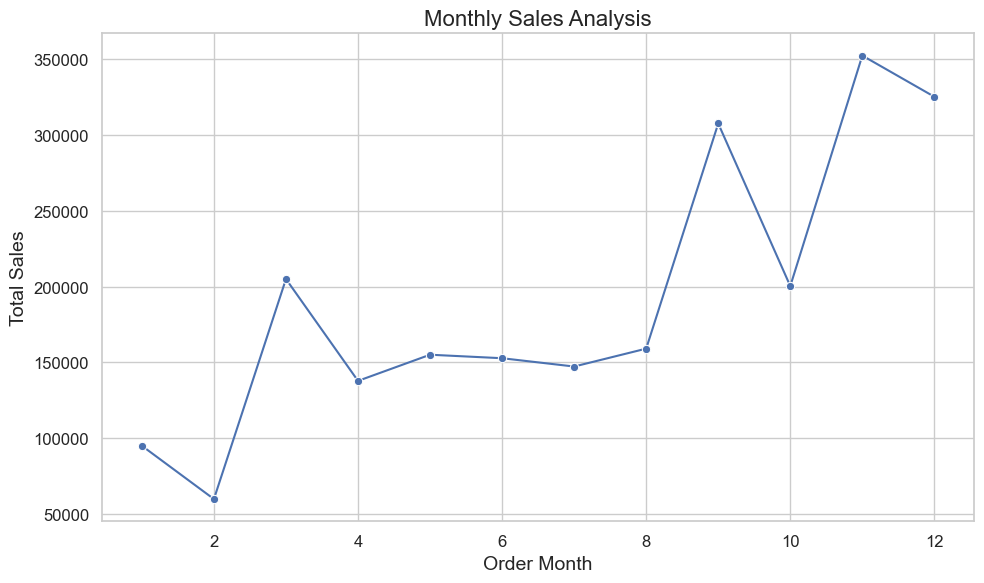

In [10]:
# Sales Analysis - Monthly Sales Trends
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_month, x='Order Month', y='Sales', marker='o', color='b')
plt.title('Monthly Sales Analysis', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Insight: Sales peak during specific months. This could be due to seasonal factors or promotions.

# Sales analysis by category

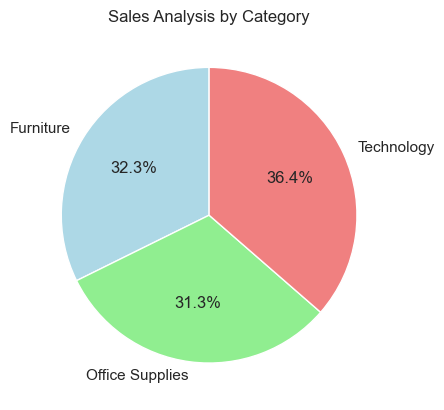

In [11]:
# Sales Analysis by Category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Analysis by Category')
plt.show()

# Insight: Specific categories contribute disproportionately to total sales. Focus on high-performing categories.

# Sales analysis by sub-category

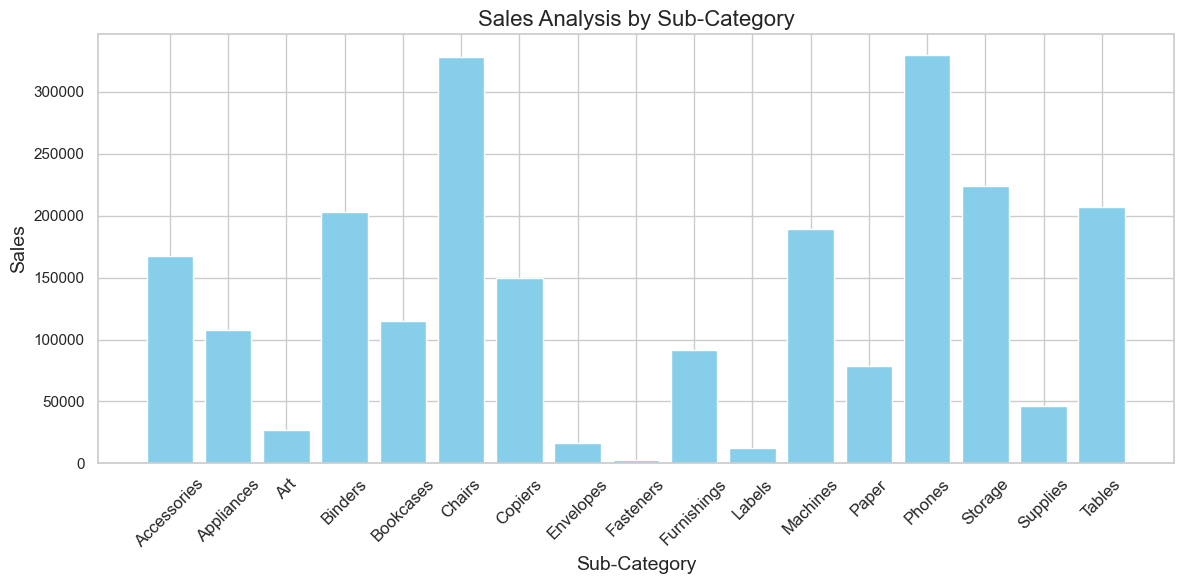

In [12]:
# Sales Analysis by Sub-Category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(sales_by_subcategory['Sub-Category'], sales_by_subcategory['Sales'], color='skyblue')
plt.title('Sales Analysis by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Monthly sales analysis

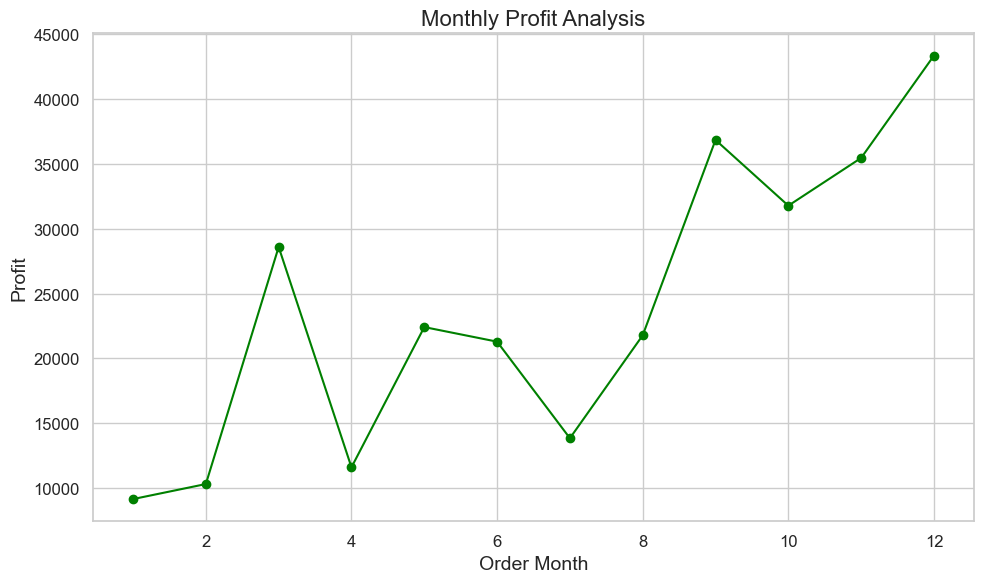

In [13]:
# Profit Analysis - Monthly Profit Trends
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(profit_by_month['Order Month'], profit_by_month['Profit'], marker='o', color='green')
plt.title('Monthly Profit Analysis', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Insight: Profit trends mirror sales but may also reveal inefficiencies in some months.

# Profit analysis by category

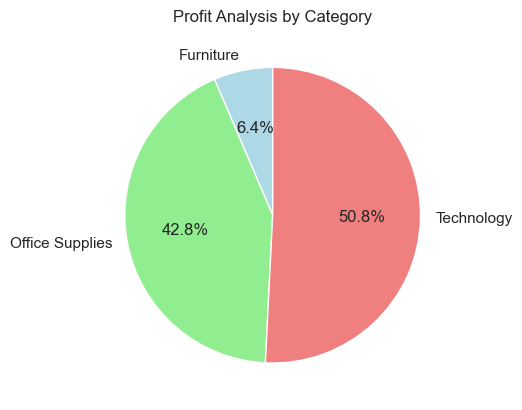

In [14]:
# Profit Analysis by Category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.pie(profit_by_category['Profit'], labels=profit_by_category['Category'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Profit Analysis by Category')
plt.show()

# Insight: Profitability may not align with sales performance, suggesting differences in margins.

# Profit analysis by subcategory

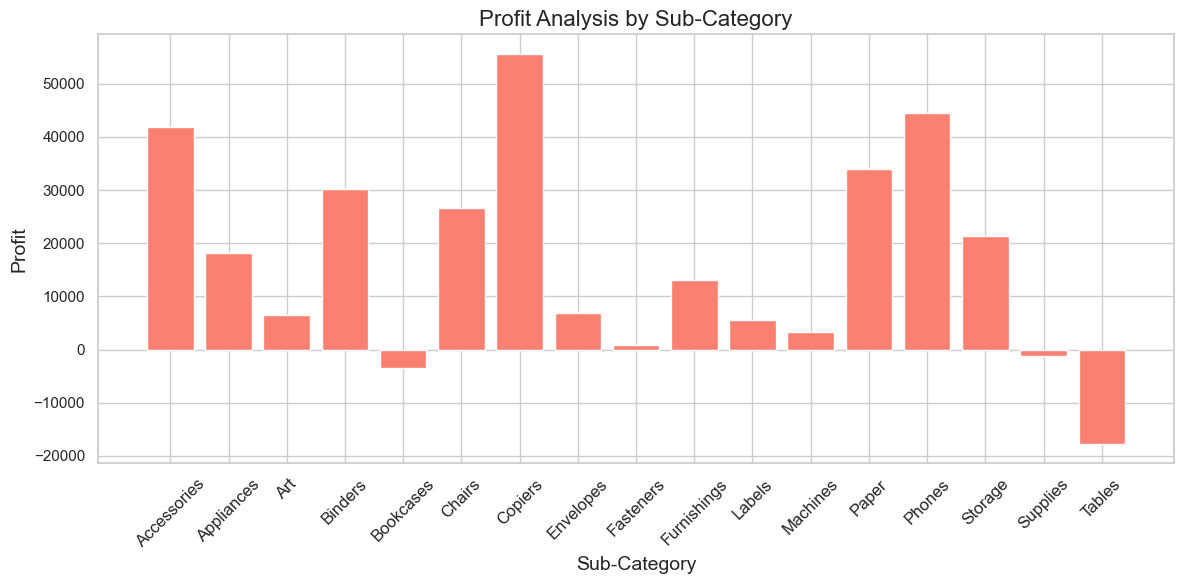

In [15]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(profit_by_subcategory['Sub-Category'], profit_by_subcategory['Profit'], color='salmon')
plt.title('Profit Analysis by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Sales and Profit Analysis by Customer Segment

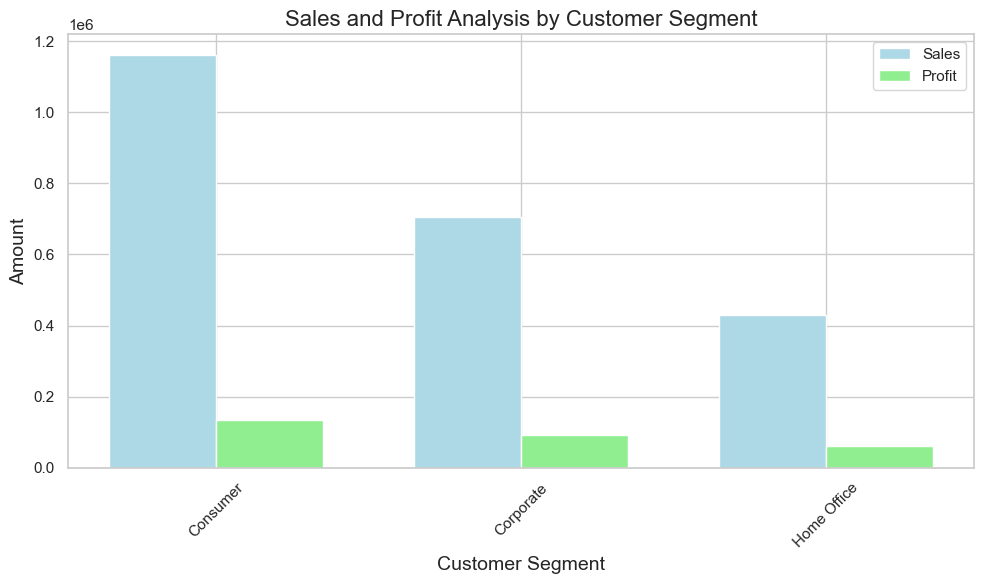

In [16]:
# Sales and Profit Analysis by Customer Segment
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(sales_profit_by_segment))
plt.bar(index, sales_profit_by_segment['Sales'], bar_width, label='Sales', color='lightblue')
plt.bar([i + bar_width for i in index], sales_profit_by_segment['Profit'], bar_width, label='Profit', color='lightgreen')
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Sales and Profit Analysis by Customer Segment', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], sales_profit_by_segment['Segment'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Analyse sales-to-profit ratio

In [17]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


# Insight: Segments with low profitability ratios are more efficient. Investigate high-ratio segments.